In [ ]:
!pip install harmonypy

In [56]:
import scanpy.external as sce
import scanpy as sc
import pandas as pd
import anndata as ad
import numpy as np

In [69]:
import glob

def find_files(path, search_string):
    pattern = f"{path}/**/*{search_string}*"
    return glob.glob(pattern, recursive=True)

# Example usage
path = "/sbgenomics/project-files/"
search_string = "_tregs_v2"
matching_files = find_files(path, search_string)

for file in matching_files:
    print(file)


/sbgenomics/project-files/VUMC_HTAN_All_NonEPI_V2_tregs_v2.h5ad
/sbgenomics/project-files/VUMC_HTAN_VAL_DIS_NONEPI_V2_tregs_v2.h5ad
/sbgenomics/project-files/adata.combined.mnnc.010920_tregs_v2.h5ad
/sbgenomics/project-files/adata.immune.010920_tregs_v2.h5ad
/sbgenomics/project-files/adata.immune.SCLC_samples_only.010920_tregs_v2.h5ad
/sbgenomics/project-files/adata.tcell.010920_tregs_v2.h5ad
/sbgenomics/project-files/glasner_etal_globalAnndata_20230112.vHTA_tregs_v2.h5ad


In [70]:
adata_treg_list=[]
for file in matching_files:
    adata_treg_list.append(sc.read_h5ad(file))

In [109]:
adata_treg_list

[AnnData object with n_obs × n_vars = 276 × 20022
     obs: 'sample', 'batch', 'leiden', 'Cell Type', 'HTAN Specimen ID', 'Tumor_Type', 'Sample_Classification', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'mito_frac', 'n_genes', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
     var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'n_counts'
     uns: 'Cell Type_colors', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'over_clustering', 'pca', 'predicted_labels_colors', 'umap'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 312 × 19258
     obs: 'HTAN Parent Data File ID', 'HTAN Specimen ID', 'Cell_Type', 'Tumor_Type', 'Sample_Classification', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'mito_frac', 'n_genes', 'predicted_labels', 'over_clustering', 'majority_voting'

In [71]:
combine_adata = ad.concat(adata_treg_list,label='source')

/opt/conda/lib/python3.11/site-packages/anndata/_core/merge.py:1390: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [72]:
# Dictionary mapping numbers to strings
mapping_dict = {
    '0': 'VUMC_HTAN_All_NonEPI_V2',
    '1': 'VUMC_HTAN_VAL_DIS_NONEPI_V2',
    '2': 'adata.combined.mnnc.010920',
    '3': 'adata.immune.010920',
    '4': 'adata.immune.SCLC_samples_only.010920',
    '5':'adata.tcell.010920',
    '6':'glasner_etal_globalAnndata_20230112.vHTA'
}
combine_adata.obs['source'] = combine_adata.obs['source'].map(mapping_dict)


In [102]:
# Dictionary mapping numbers to strings
mapping_dict = {
    'VUMC_HTAN_All_NonEPI_V2':'CRC',
     'VUMC_HTAN_VAL_DIS_NONEPI_V2':'CRC',
    'adata.combined.mnnc.010920':'Lung NOS',
     'adata.immune.010920':'Lung NOS',
     'adata.immune.SCLC_samples_only.010920':'Lung NOS',
    'adata.tcell.010920':'Lung NOS',
    'glasner_etal_globalAnndata_20230112.vHTA':'Lung NOS, Pleura NOS, Lymph node NOS'
}
combine_adata.obs['source_atlas'] = combine_adata.obs['source'].map(mapping_dict)


In [73]:
# # Normalization scaling sc
# sc.pp.normalize_total(adata_sc_subset)
# sc.pp.log1p(adata_sc_subset)

# # Calculate QC metrics
# sc.pp.calculate_qc_metrics(adata_sc_subset, percent_top=None, inplace=True)

# # Scale data to unit variance and zero mean
# sc.pp.regress_out(adata_sc_subset, ['total_counts'])
# sc.pp.scale(adata_sc_subset)

In [74]:
sc.tl.pca(combine_adata,n_comps=50)

Before integration

In [90]:
sc.pp.neighbors(combine_adata,n_neighbors=30,use_rep='X_pca')

In [91]:
sc.tl.umap(combine_adata)

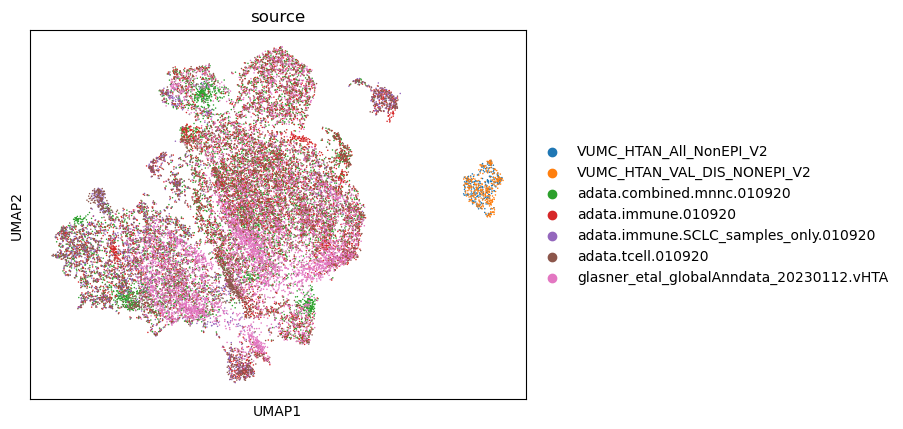

In [92]:
sc.pl.umap(combine_adata, color='source')

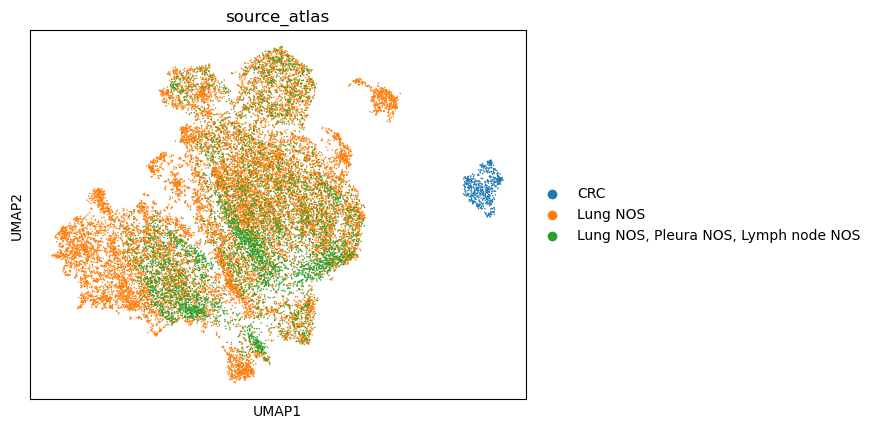

In [103]:
sc.pl.umap(combine_adata, color='source_atlas')

In [93]:
sc.tl.leiden(combine_adata,resolution=1)

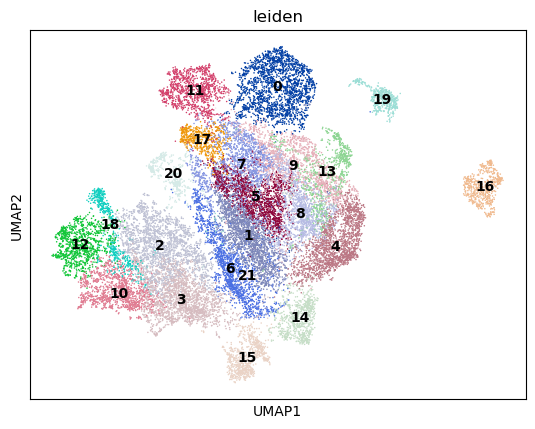

In [94]:
sc.pl.umap(combine_adata, color='leiden',legend_loc='on data')

In [95]:
sc.tl.rank_genes_groups(combine_adata, groupby="leiden")


/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

In [96]:
dedf = sc.get.rank_genes_groups_df(combine_adata, group="0")

In [97]:
sc.tl.rank_genes_groups(combine_adata, 'leiden', method='t-test')


/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

In [98]:
markers = []
markers_pval_row=[]
markers_row=[]

temp = pd.DataFrame(combine_adata.uns['rank_genes_groups']['names']).head(3)
temp_score = pd.DataFrame(combine_adata.uns['rank_genes_groups']['scores']).head(3)
temp_pvale = pd.DataFrame(combine_adata.uns['rank_genes_groups']['pvals']).head(3)

for i in range(temp.shape[1]):
    curr_col = temp.iloc[:, i].to_list()
    curr_col_score = temp_score.iloc[:, i].to_list()
    curr_col_pvale=temp_pvale.iloc[:, i].to_list()
    list_true=[x>0 for x in curr_col_score]
    curr_col=list(np.array(curr_col)[list_true])
    curr_col_pvale=list(np.array(curr_col_pvale)[list_true])
    
    markers = markers + curr_col
    markers_row.append(curr_col)
    markers_pval_row.append(curr_col_pvale)
    print(i, curr_col)

0 ['RGS1', 'CREM', 'SRGN']
1 ['PTMA', 'EEF1A1', 'TPT1']
2 ['JUND', 'MTRNR2L12', 'GNAS']
3 ['JUND', 'ETS1', 'MTRNR2L12']
4 ['HSP90AA1', 'HSP90AB1', 'HSPA1A']
5 ['AC090498.1', 'ZNF90', 'NBEAL1']
6 ['B2M', 'HLA-B', 'ACTB']
7 ['S100A4', 'IL32', 'PFN1']
8 ['HSPA1A', 'HSP90AA1', 'DNAJB1']
9 ['HSPA1A', 'DNAJB1', 'HSPE1']
10 ['MTRNR2L12', 'JUND', 'GNAS']
11 ['STMN1', 'TUBB', 'TUBA1B']
12 ['MTRNR2L12', 'JUND', 'GNAS']
13 ['HSPE1', 'DNAJB1', 'DNAJA1']
14 ['HLA-A', 'HSPA1A', 'B2M']
15 ['MTRNR2L12', 'N4BP2L2', 'ARGLU1']
16 ['RBFOX2', 'STEAP1B', 'CCSER1']
17 ['AC090498.1', 'LSP1', 'NBEAL1']
18 ['JUND', 'MTRNR2L12', 'CD81']
19 ['RACK1', 'S100A6', 'CD52']
20 ['CD3D', 'SERF2', 'GAPDH']
21 ['PTMA', 'ACTB', 'STMN1']


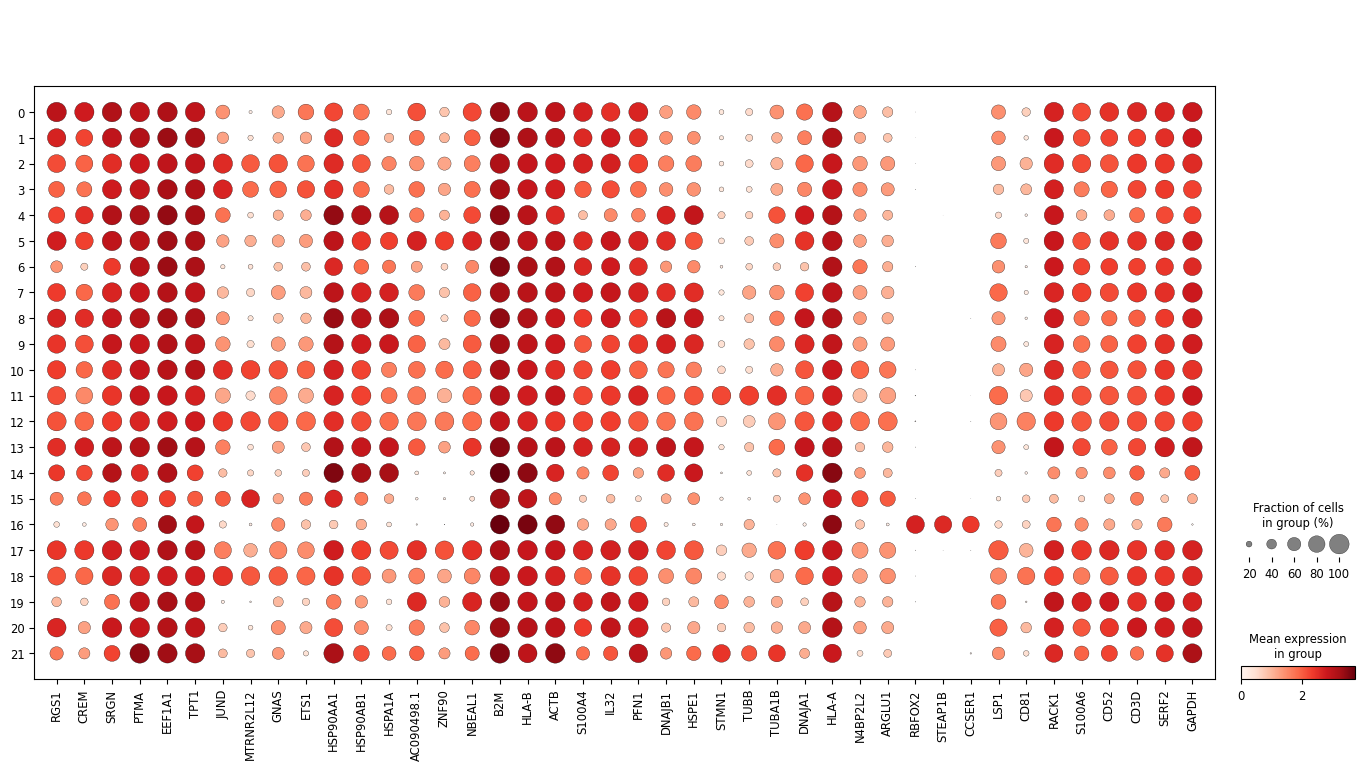

In [99]:
markers_apper=[]
for i in markers:
    if i not in markers_apper:
        markers_apper.append(i)        
        
        
sc.pl.dotplot(combine_adata, markers_apper, 
                   groupby='leiden')

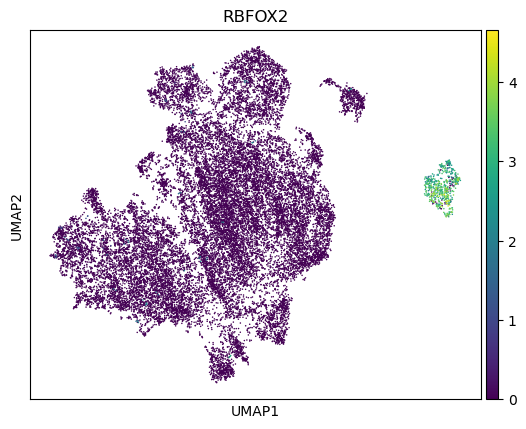

In [101]:
sc.pl.umap(combine_adata, color='RBFOX2',legend_loc='on data')

After integration

In [75]:
sce.pp.harmony_integrate(combine_adata, 'source')

2024-11-08 15:18:13,427 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-11-08 15:18:16,806 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-11-08 15:18:16,989 - harmonypy - INFO - Iteration 1 of 10
2024-11-08 15:18:22,952 - harmonypy - INFO - Iteration 2 of 10
2024-11-08 15:18:28,689 - harmonypy - INFO - Iteration 3 of 10
2024-11-08 15:18:34,259 - harmonypy - INFO - Iteration 4 of 10
2024-11-08 15:18:38,486 - harmonypy - INFO - Iteration 5 of 10
2024-11-08 15:18:41,359 - harmonypy - INFO - Iteration 6 of 10
2024-11-08 15:18:44,171 - harmonypy - INFO - Iteration 7 of 10
2024-11-08 15:18:50,014 - harmonypy - INFO - Iteration 8 of 10
2024-11-08 15:18:55,366 - harmonypy - INFO - Iteration 9 of 10
2024-11-08 15:18:58,673 - harmonypy - INFO - Iteration 10 of 10
2024-11-08 15:19:01,075 - harmonypy - INFO - Stopped before convergence


In [104]:
sc.pp.neighbors(combine_adata,n_neighbors=30,use_rep='X_pca_harmony')

In [108]:
combine_adata

AnnData object with n_obs × n_vars = 25337 × 13953
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'mito_frac', 'n_genes', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'source', 'leiden', 'source_atlas'
    uns: 'pca', 'neighbors', 'umap', 'source_colors', 'leiden', 'leiden_colors', 'rank_genes_groups', 'source_atlas_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [105]:
sc.tl.umap(combine_adata)

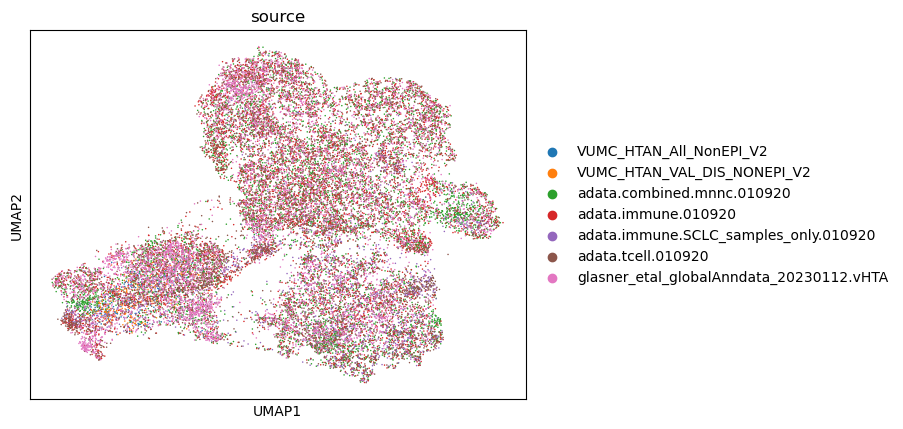

In [106]:
sc.pl.umap(combine_adata, color='source')

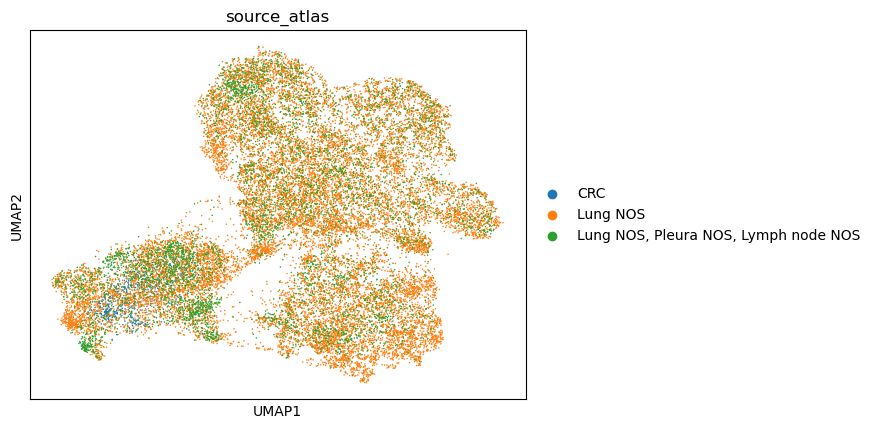

In [107]:
sc.pl.umap(combine_adata, color='source_atlas')

In [154]:
sc.tl.leiden(combine_adata,resolution=1)

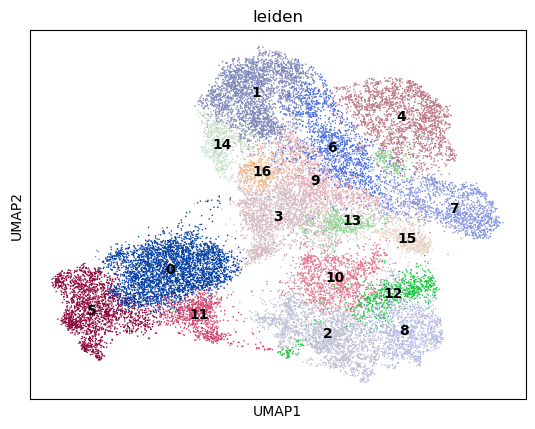

In [155]:
sc.pl.umap(combine_adata, color='leiden',legend_loc='on data')

In [156]:
sc.tl.rank_genes_groups(combine_adata, groupby="leiden")


In [157]:
dedf = sc.get.rank_genes_groups_df(combine_adata, group="0")

In [158]:
sc.tl.rank_genes_groups(combine_adata, 'leiden', method='t-test')


In [159]:
markers = []
markers_pval_row=[]
markers_row=[]

temp = pd.DataFrame(combine_adata.uns['rank_genes_groups']['names']).head(3)
temp_score = pd.DataFrame(combine_adata.uns['rank_genes_groups']['scores']).head(3)
temp_pvale = pd.DataFrame(combine_adata.uns['rank_genes_groups']['pvals']).head(3)

for i in range(temp.shape[1]):
    curr_col = temp.iloc[:, i].to_list()
    curr_col_score = temp_score.iloc[:, i].to_list()
    curr_col_pvale=temp_pvale.iloc[:, i].to_list()
    list_true=[x>0 for x in curr_col_score]
    curr_col=list(np.array(curr_col)[list_true])
    curr_col_pvale=list(np.array(curr_col_pvale)[list_true])
    
    markers = markers + curr_col
    markers_row.append(curr_col)
    markers_pval_row.append(curr_col_pvale)
    print(i, curr_col)

0 ['EEF1A1', 'B2M', 'HLA-B']
1 ['HSPH1', 'HSP90AA1', 'HSP90AB1']
2 ['JUND', 'MTRNR2L12', 'GNAS']
3 ['IL32', 'S100A4', 'TRAC']
4 ['RGS1', 'CREM', 'SRGN']
5 ['B2M', 'HLA-B', 'MTRNR2L12']
6 ['CXCL13', 'GAPDH', 'RGS2']
7 ['TUBA1B', 'TUBB', 'RAN']
8 ['MTRNR2L12', 'JUND', 'GNAS']
9 ['HSPA1A', 'IL32', 'DNAJB1']
10 ['JUND', 'S100A4', 'GNAS']
11 ['JUND', 'TXNIP', 'MTRNR2L12']
12 ['JUND', 'MTRNR2L12', 'GNAS']
13 ['IL32', 'PFN1', 'GAPDH']
14 ['HSPE1', 'H3F3B', 'DNAJA1']
15 ['CD52', 'NBEAL1', 'AC090498.1']
16 ['AC090498.1', 'ZNF90', 'EEF1D']


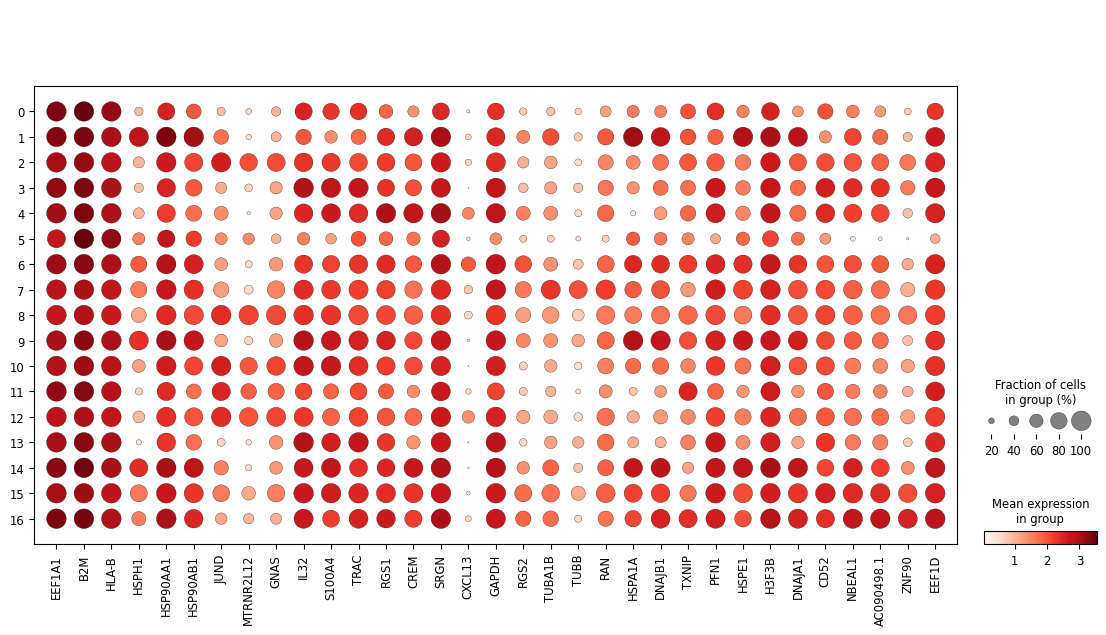

In [160]:
markers_apper=[]
for i in markers:
    if i not in markers_apper:
        markers_apper.append(i)        
        
        
sc.pl.dotplot(combine_adata, markers_apper, 
                   groupby='leiden')

In [161]:
combine_adata.var.index=combine_adata.var.index.str.upper()

In [162]:
markers_group1=['LAYN',
'MEOX',
'ICOS',
'CTLA4',
'HAVCR2',
'LAG3',
'KLRG1',
'EBI3',
'PDCD1',
'RORA',
'TNFRSF4',
'TNFRSF9',
'TNFRSF18',
'TNFRSF25',
'GATA3',
'BATF',
'TBX21',
'ZAP70',
'CXCR3',
'CXCR6']

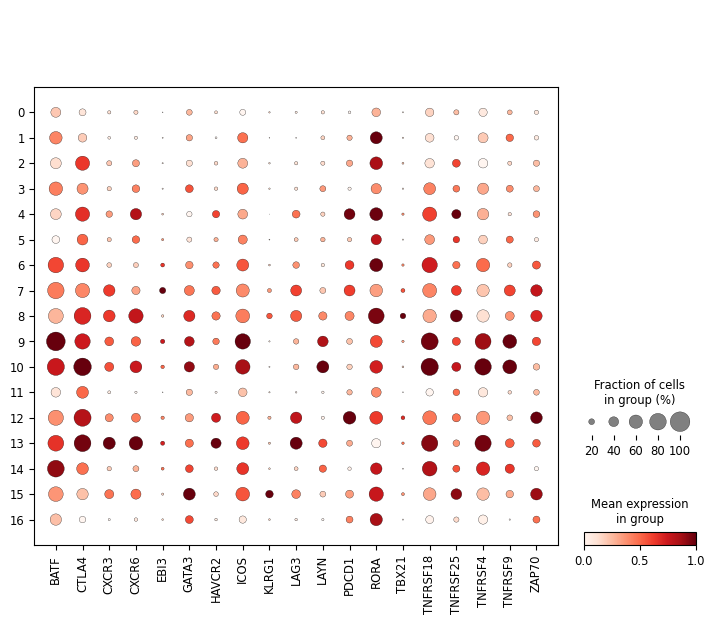

In [163]:
sc.pl.dotplot(combine_adata, np.intersect1d(markers_group1,combine_adata.var.index), groupby="leiden", standard_scale="var")


In [164]:
markers_group2=['ITGA1',
'ITGA2',
'ITGA3',
'ITGA4',
'ITGA5',
'ITGA6',
'ITGA7',
'ITGB1',
'ITGB2',
'ITGB3',
'ITGB4',
'ITGB5',
'ITGB6',
'ITGB7',
'ITGAE',
'ITGAX',
'ITGAM',
'FAK']

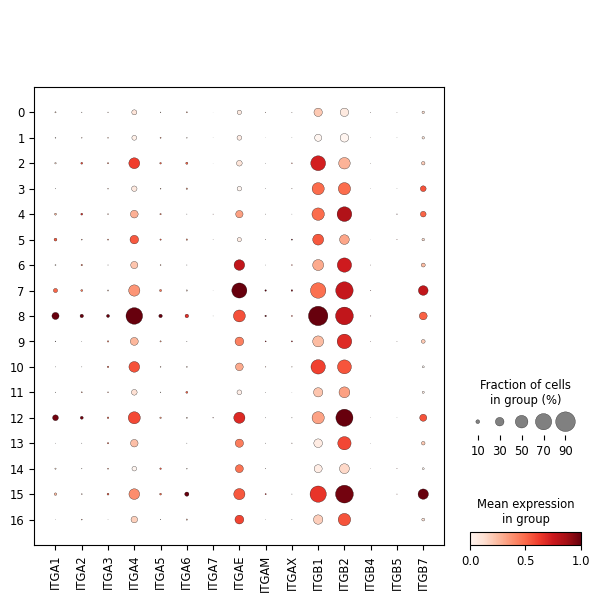

In [165]:
sc.pl.dotplot(combine_adata, np.intersect1d(markers_group2,combine_adata.var.index), groupby="leiden", standard_scale="var")


In [166]:
markers_group3=['ENTPD1',
'NT5E',
'IL2RA']

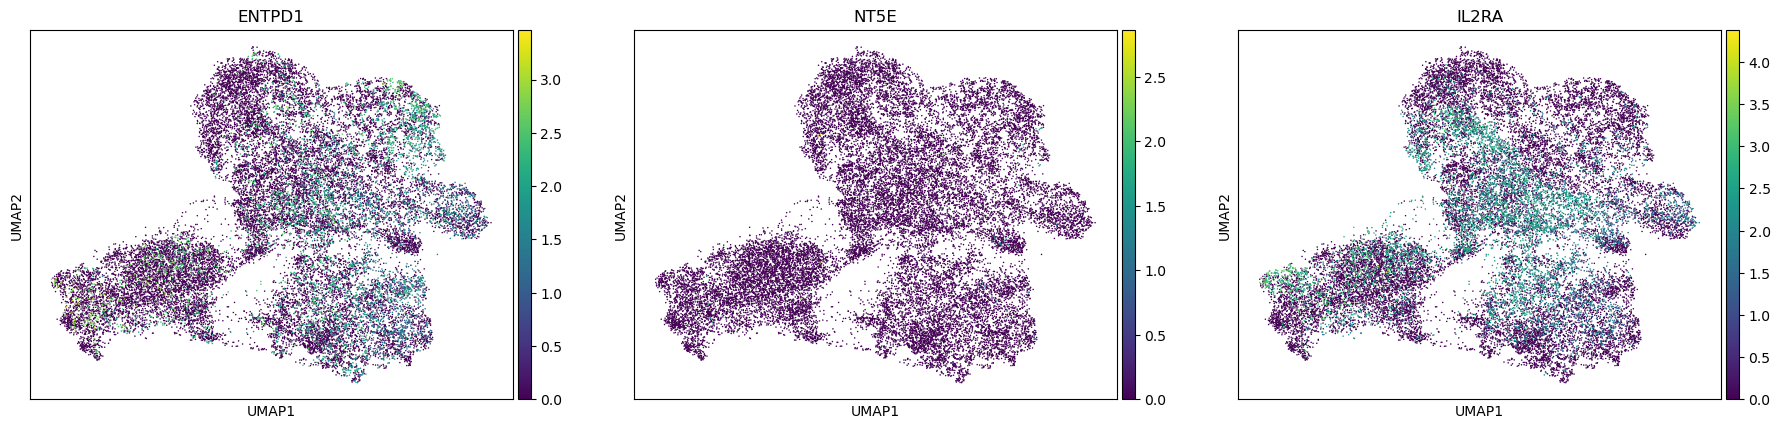

In [167]:
sc.pl.umap(combine_adata,color=markers_group3)

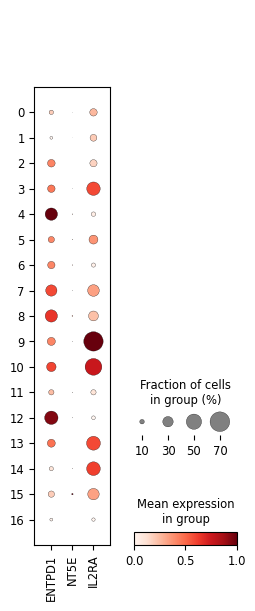

In [168]:
sc.pl.dotplot(combine_adata, markers_group3, groupby="leiden", standard_scale="var")


In [169]:
markers_group3=['CD8A',
'CD8B']

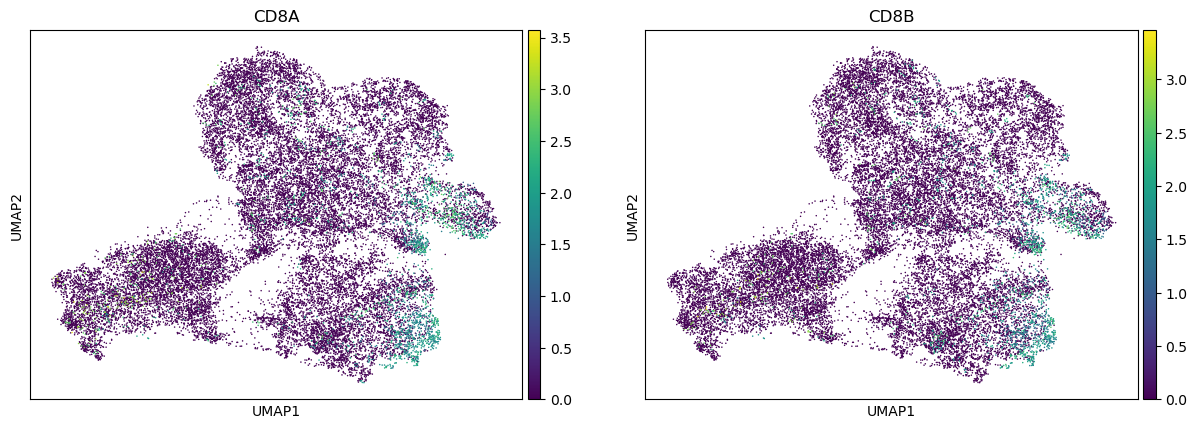

In [170]:
sc.pl.umap(combine_adata,color=markers_group3)

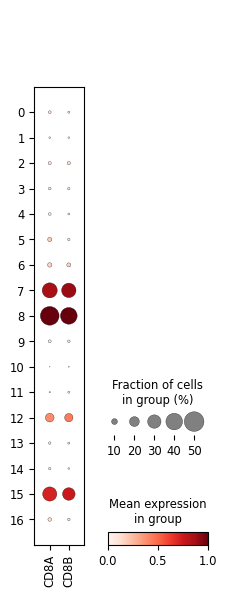

In [171]:
sc.pl.dotplot(combine_adata, markers_group3, groupby="leiden", standard_scale="var")


In [142]:
all_marker=markers_group1+markers_group2+markers_group3

In [143]:
np.intersect1d(all_marker,combine_adata.var.index)

array(['BATF', 'CTLA4', 'CXCR3', 'CXCR6', 'EBI3', 'ENTPD1', 'GATA3',
       'HAVCR2', 'ICOS', 'IL2RA', 'ITGA1', 'ITGA2', 'ITGA3', 'ITGA4',
       'ITGA5', 'ITGA6', 'ITGA7', 'ITGAE', 'ITGAM', 'ITGAX', 'ITGB1',
       'ITGB2', 'ITGB4', 'ITGB5', 'ITGB7', 'KLRG1', 'LAG3', 'LAYN',
       'NT5E', 'PDCD1', 'RORA', 'TBX21', 'TNFRSF18', 'TNFRSF25',
       'TNFRSF4', 'TNFRSF9', 'ZAP70'], dtype=object)

In [135]:
markers = np.intersect1d(markers_group1+markers_group2+markers_group3,combine_adata.var.index)

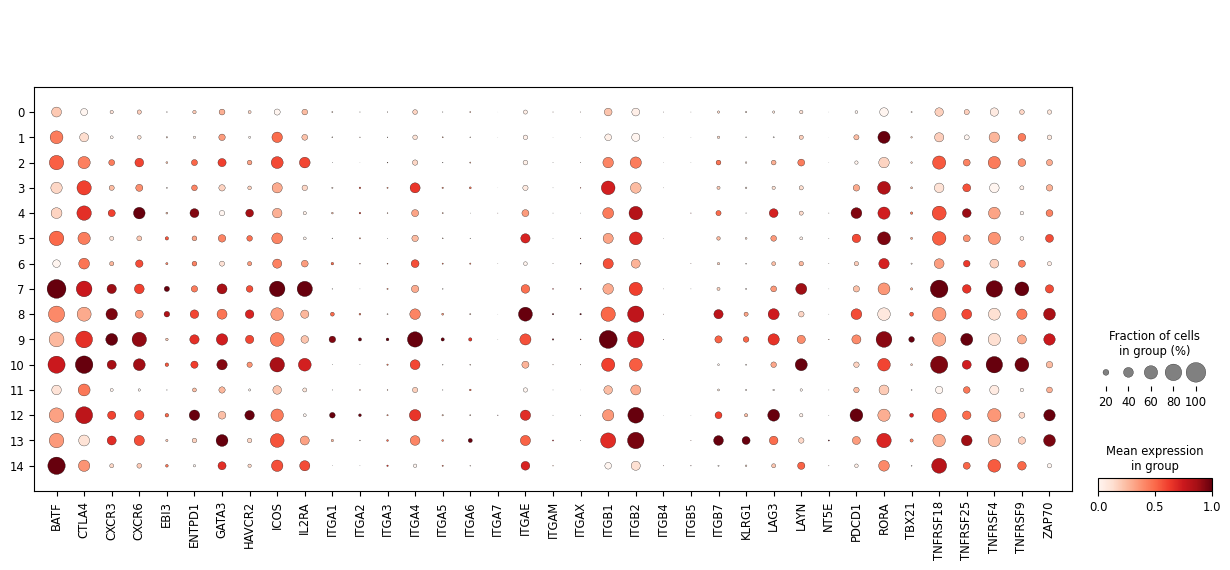

In [136]:
sc.pl.dotplot(combine_adata, markers, groupby="leiden", standard_scale="var")
